<a href="https://colab.research.google.com/github/adrienphilardeau/FashionNMIST/blob/master/Fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#inspired by https://www.kaggle.com/bugraokcu/cnn-with-keras
from keras.utils import to_categorical
import numpy as np
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random 
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


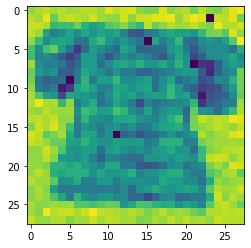

In [0]:
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[0]) # 0 is the index of the training image you want to display

In [0]:
with open("train_labels.csv") as csv_file:
  csv_reader = csv.reader(csv_file)
  colnames = next(csv_reader)
  train_labels = list(csv_reader)
train_labels = np.array(train_labels)

In [0]:
x_train = np.load("train_images.npy")/255
y_train = to_categorical(train_labels[:, 1])

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_train.astype("float32")
x_test.astype("float32")
x_validate.astype("float32")

array([[[0.28627452, 0.3372549 , 0.37254903, ..., 0.34509805,
         0.34509805, 0.3137255 ],
        [0.30588236, 0.38039216, 0.2901961 , ..., 0.33333334,
         0.3764706 , 0.35686275],
        [0.28627452, 0.24705882, 0.29803923, ..., 0.3647059 ,
         0.30980393, 0.28235295],
        ...,
        [0.25490198, 0.40392157, 0.8039216 , ..., 0.34901962,
         0.30588236, 0.30588236],
        [0.28235295, 0.3254902 , 0.3529412 , ..., 0.28235295,
         0.3372549 , 0.27058825],
        [0.28627452, 0.28627452, 0.28627452, ..., 0.3019608 ,
         0.3019608 , 0.2901961 ]],

       [[0.32941177, 0.34901962, 0.24313726, ..., 0.32156864,
         0.3529412 , 0.34117648],
        [0.38039216, 0.27058825, 0.32941177, ..., 0.33333334,
         0.3254902 , 0.32156864],
        [0.26666668, 0.34901962, 0.2627451 , ..., 0.38039216,
         0.36078432, 0.30588236],
        ...,
        [0.3254902 , 0.36078432, 0.45882353, ..., 0.36862746,
         0.34117648, 0.3372549 ],
        [0.3

In [0]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("x_validate shape: {}".format(x_validate.shape))

x_train shape: (32000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (8000, 28, 28, 1)


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',
kernel_initializer='he_normal',
input_shape=im_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10))
model.add(Activation("softmax"))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, batch_size = batch_size, epochs = 10, verbose = 1, validation_data = (x_validate, y_validate))

In [0]:
x_test = np.load('test_images.npy').squeeze()
x_test = x_test.reshape(len(x_test), *im_shape)
y_test = model.predict_classes(x_test)
df_test = pd.read_csv('sample_submission.csv')
df_test['label'] = y_test
df_test.to_csv('SubmissionFinal.csv', index=False)